In [ ]:
# AMATH 581 HW 2
# Jonathan McCormack 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import pywt
import pywt.data

In [2]:
# some utility functions for data scaling and visualization 

np.random.seed(0)

def to_float01(img):
    img = img.astype(np.float64, copy=False)
    mn, mx = float(img.min()), float(img.max())
    if mx > mn:
        img = (img - mn) / (mx - mn)
    else:
        img = np.zeros_like(img, dtype=np.float64)
    return img

def show(img, title=None, cmap="gray", vmin=0, vmax=1):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()

def gauss(img, sigma):
    s = img.shape[0]
    img_hat = fftshift(fft2(img))
    k_grid = np.linspace(-s/2, s/2, s)
    kx, ky = np.meshgrid(k_grid, k_grid)
    gauss_val = np.exp( - ((kx**2 + ky**2)/(2*sigma**2)))
    return np.real(ifft2(ifftshift(img_hat*gauss_val)))

Image source: Camera image from pywt.data
Shape: (512, 512) min/max: 0.0 1.0


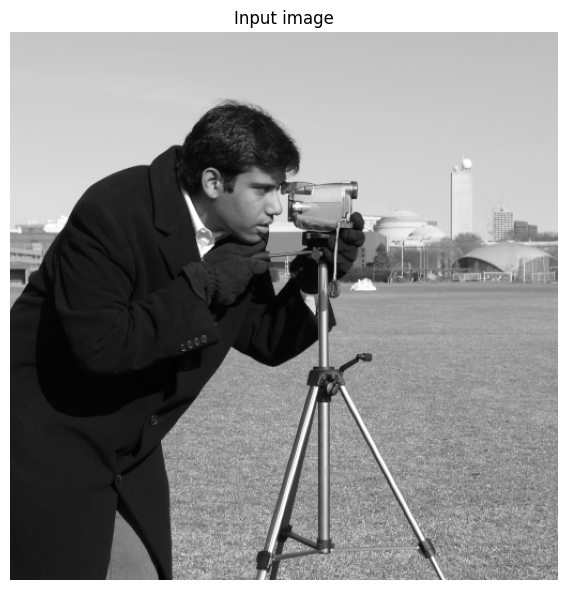

In [3]:
# load image 
img = pywt.data.camera()
img = to_float01(img)
source = "Camera image from pywt.data"

print("Image source:", source)
print("Shape:", img.shape, "min/max:", img.min(), img.max())
show(img, "Input image")

0.4427344496701914
0.5931272703798285
0.8101533747770848


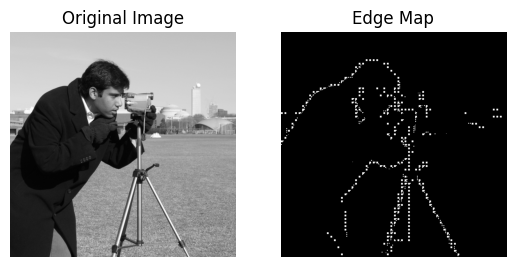

In [4]:
## Standard Method

# Establishing any random noise
sigma = 0
noisy = np.clip(img + sigma*np.random.randn(*img.shape), 0, 1)

# Establishing the number of wavelet decompositions
level = 3
coeffs = pywt.wavedec2(noisy, 'haar', mode='periodization', level=level)

# Zeroing out all coefficients from the approximation (the lowest frequency information after the last wavelet decomposition)
thresholded_coeffs = [0]
thresholded_coeffs[0] = np.zeros_like(coeffs[0])

for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i] # unpack the wavelet coefficients
    cH = np.abs(cH)/np.max(np.abs(cH)); cV = np.abs(cV)/np.max(np.abs(cV)); cD = np.abs(cD)/np.max(np.abs(cD)) # normalize
    wav_img = np.sqrt(cH**2 + cV**2 + cD**2) # create a edge map at the current wavelet
    threshold = np.mean(wav_img) + 2*(i)*np.std(wav_img) # create a threshold by finding the mean + 2x std
    print(threshold)
    thresholded_img = pywt.threshold(wav_img, threshold, mode='hard') # apply threshold to current edge map
    thresholded_coeffs.append((thresholded_img, thresholded_img, thresholded_img)) # append current edge map to total

edge_map = pywt.waverec2(thresholded_coeffs, 'haar', mode='periodization') # reconstruct the image
edge_map = edge_map > 0 # create a binary map by making all values equal to 1

fig1 = plt.figure()
plt.subplot(121), plt.imshow(noisy, cmap='gray'), plt.title('Original Image'), plt.axis("off")
plt.subplot(122), plt.imshow(edge_map, cmap='gray'), plt.title('Edge Map'), plt.axis("off")
fig1.savefig('Figure1.png')


0.4806217949328796
0.7350648572677236
0.9975536958281828
0.5225247673540636
0.7719573523969565
1.0237254675091967
0.6225981656758405
0.8992900221216874
1.1278816905901992


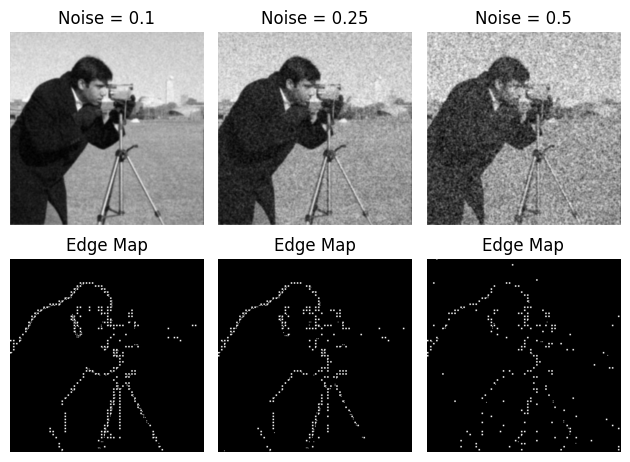

In [5]:
## Using the same method with increasing noise

##
sigma = 0.1
noisy = np.clip(img + sigma*np.random.randn(*img.shape), 0, 1)
noisy = gauss(noisy, 50)

level = 3
coeffs = pywt.wavedec2(noisy, 'haar', mode='periodization', level=level)

thresholded_coeffs = [0]
thresholded_coeffs[0] = np.zeros_like(coeffs[0])

for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    cH = np.abs(cH)/np.max(np.abs(cH)); cV = np.abs(cV)/np.max(np.abs(cV)); cD = np.abs(cD)/np.max(np.abs(cD))
    wav_img = np.sqrt(cH**2 + cV**2 + cD**2)
    threshold = np.mean(wav_img) + 2*(i)*np.std(wav_img)
    print(threshold)
    thresholded_img = pywt.threshold(wav_img, threshold, mode='hard')
    thresholded_coeffs.append((thresholded_img, thresholded_img, thresholded_img))

edge_map = pywt.waverec2(thresholded_coeffs, 'haar', mode='periodization')
edge_map = edge_map > 0

fig2 = plt.figure()
plt.subplot(231), plt.imshow(noisy, cmap='gray'), plt.title('Noise = 0.1'), plt.axis("off")
plt.subplot(234), plt.imshow(edge_map, cmap='gray'), plt.title('Edge Map'), plt.axis("off")

##
sigma = 0.25
noisy = np.clip(img + sigma*np.random.randn(*img.shape), 0, 1)
noisy = gauss(noisy, 50)

level = 3
coeffs = pywt.wavedec2(noisy, 'haar', mode='periodization', level=level)

thresholded_coeffs = [0]
thresholded_coeffs[0] = np.zeros_like(coeffs[0])

for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    cH = np.abs(cH)/np.max(np.abs(cH)); cV = np.abs(cV)/np.max(np.abs(cV)); cD = np.abs(cD)/np.max(np.abs(cD))
    wav_img = np.sqrt(cH**2 + cV**2 + cD**2)
    threshold = np.mean(wav_img) + 2*(i)*np.std(wav_img)
    print(threshold)
    thresholded_img = pywt.threshold(wav_img, threshold, mode='hard')
    thresholded_coeffs.append((thresholded_img, thresholded_img, thresholded_img))

edge_map = pywt.waverec2(thresholded_coeffs, 'haar', mode='periodization')
edge_map = edge_map > 0

plt.subplot(232), plt.imshow(noisy, cmap='gray'), plt.title('Noise = 0.25'), plt.axis("off")
plt.subplot(235), plt.imshow(edge_map, cmap='gray'), plt.title('Edge Map'), plt.axis("off")

##
sigma = 0.5
noisy = np.clip(img + sigma*np.random.randn(*img.shape), 0, 1)
noisy = gauss(noisy, 50)

level = 3
coeffs = pywt.wavedec2(noisy, 'haar', mode='periodization', level=level)

thresholded_coeffs = [0]
thresholded_coeffs[0] = np.zeros_like(coeffs[0])

for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    cH = np.abs(cH)/np.max(np.abs(cH)); cV = np.abs(cV)/np.max(np.abs(cV)); cD = np.abs(cD)/np.max(np.abs(cD))
    wav_img = np.sqrt(cH**2 + cV**2 + cD**2)
    threshold = np.mean(wav_img) + 2*(i)*np.std(wav_img)
    print(threshold)
    thresholded_img = pywt.threshold(wav_img, threshold, mode='hard')
    thresholded_coeffs.append((thresholded_img, thresholded_img, thresholded_img))

edge_map = pywt.waverec2(thresholded_coeffs, 'haar', mode='periodization')
edge_map = edge_map > 0

plt.subplot(233), plt.imshow(noisy, cmap='gray'), plt.title('Noise = 0.5'), plt.axis("off")
plt.subplot(236), plt.imshow(edge_map, cmap='gray'), plt.title('Edge Map'), plt.axis("off")
plt.tight_layout()
plt.show()
fig2.savefig('Figure2.png')